In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('House_p_p.csv')

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
df.shape

(29451, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
df.duplicated().sum()

401

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [11]:
df.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0


In [12]:
cat_col = []            # categorical features

for i in df.columns:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
cat_col

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [13]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print('----------------------------------------------')

POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64
----------------------------------------------
BHK_OR_RK
BHK    29026
RK        24
Name: BHK_OR_RK, dtype: int64
----------------------------------------------
ADDRESS
Zirakpur,Chandigarh                474
Whitefield,Bangalore               222
Raj Nagar Extension,Ghaziabad      212
Sector-137 Noida,Noida             136
New Town,Kolkata                   129
                                  ... 
Koregaon Mul,Pune                    1
Film City Road,Maharashtra           1
Sector-44A Seawoods,Mumbai           1
Bhandup Central Mumbai,Lalitpur      1
Pursottam Nagar,Surat                1
Name: ADDRESS, Length: 6899, dtype: int64
----------------------------------------------


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

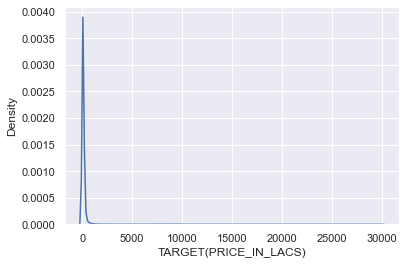

In [14]:
sns.distplot((df['TARGET(PRICE_IN_LACS)']),hist=False)

<AxesSubplot:xlabel='BHK_NO.'>

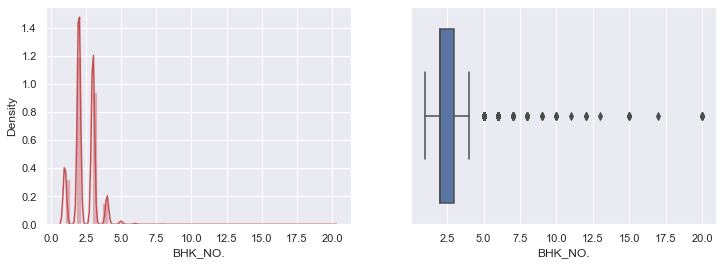

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['BHK_NO.'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['BHK_NO.'])

In [16]:
per75 = df['BHK_NO.'].quantile(0.75)  # iqr method for outliers
per25 = df['BHK_NO.'].quantile(0.25)

iqr = per75 - per25
iqr

1.0

In [17]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

print('upper_l', upper_limit)
print('lower_l', lower_limit)

upper_l 4.5
lower_l 0.5


In [18]:
df[(df['BHK_NO.'] > 5) | (df['BHK_NO.'] < lower_limit)] # outliers

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
361,Dealer,1,1,6,BHK,10050.251260,0,1,"Sector-124 Noida,Noida",28.548382,77.327819,1200.0
681,Owner,0,0,6,BHK,3200.189641,1,1,"Siruseri Sipcot IT-Park,Chennai",12.833224,80.210726,270.0
1093,Dealer,0,0,6,BHK,5800.464037,1,1,"Rambagh,Jaipur",26.901661,75.815245,500.0
1289,Dealer,0,0,6,BHK,11263.157890,1,0,"Sathya Sai Layout,Bangalore",12.929162,77.629041,1070.0
1300,Dealer,0,0,6,BHK,8500.148753,1,1,"Andheri (West),Lalitpur",19.139348,72.820458,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27721,Dealer,0,0,8,BHK,9594.298246,1,1,"Bhosale Nagar,Pune",18.543533,73.836246,1400.0
27898,Dealer,0,0,6,BHK,3600.065456,1,1,"Vile Parle (West),Mumbai",19.102075,72.841149,1100.0
28233,Dealer,0,0,7,BHK,5900.053100,1,1,"Koramangala,Bangalore",12.925900,77.622900,1000.0
29004,Dealer,0,0,15,BHK,5894.736842,1,1,"Kalikapur,Kolkata",22.127030,88.518729,280.0


In [19]:
df = df[(df['BHK_NO.'] < 5) & (df['BHK_NO.'] > lower_limit)]

<AxesSubplot:xlabel='BHK_NO.'>

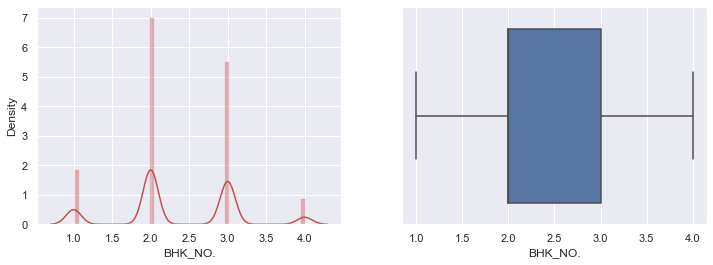

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['BHK_NO.'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['BHK_NO.'])

In [21]:
df['SQUARE_FT'] = df['SQUARE_FT'].astype('int64')
df['LATITUDE'] = df['LATITUDE'].astype('int64')
df['LONGITUDE'] = df['LONGITUDE'].astype('int64')
df['TARGET(PRICE_IN_LACS)'] = df['TARGET(PRICE_IN_LACS)'].astype('int64')

In [22]:
df.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300,1,1,"Ksfc Layout,Bangalore",12,77,55
1,Dealer,0,0,2,BHK,1275,1,1,"Vishweshwara Nagar,Mysore",12,76,51


In [23]:
df.corr()['TARGET(PRICE_IN_LACS)']

UNDER_CONSTRUCTION       0.058419
RERA                     0.071001
BHK_NO.                  0.095177
SQUARE_FT                0.416718
READY_TO_MOVE           -0.058419
RESALE                  -0.208538
LONGITUDE               -0.027877
LATITUDE                -0.017818
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

<AxesSubplot:>

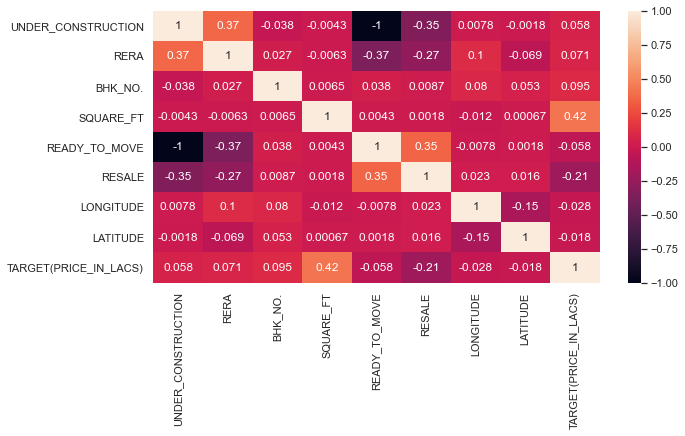

In [24]:
plt.figure(figsize=(10,5))        # 'UNDER_CONSTRUCTION' and 'READY_TO_MOVE' has high -ve correlation. they are doing same work
sns.heatmap(df.corr(),annot=True) # we can remove the 1 feature

In [25]:
df.drop('READY_TO_MOVE', axis=1, inplace=True)

In [26]:
df['POSTED_BY'].replace({'Builder':0, 'Owner':1, 'Dealer':2},inplace=True)
df['BHK_OR_RK'].replace({'RK':0, 'BHK':1},inplace=True)

In [27]:
df['LOCATION'] = df['ADDRESS'].apply(lambda x: x.split(',')[-1])

In [28]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),LOCATION
0,1,0,0,2,1,1300,1,"Ksfc Layout,Bangalore",12,77,55,Bangalore
1,2,0,0,2,1,1275,1,"Vishweshwara Nagar,Mysore",12,76,51,Mysore
2,1,0,0,2,1,933,1,"Jigani,Bangalore",12,77,43,Bangalore
3,1,0,1,2,1,929,1,"Sector-1 Vaishali,Ghaziabad",28,77,62,Ghaziabad
4,2,1,0,2,1,999,1,"New Town,Kolkata",22,88,60,Kolkata


In [29]:
df['PRICE'] = df['TARGET(PRICE_IN_LACS)'] * 100000 

In [30]:
df.drop(columns=['ADDRESS','TARGET(PRICE_IN_LACS)'],axis=1, inplace=True)

In [31]:
df.corr()['PRICE']

POSTED_BY             0.067184
UNDER_CONSTRUCTION    0.058419
RERA                  0.071001
BHK_NO.               0.095177
BHK_OR_RK             0.004302
SQUARE_FT             0.416718
RESALE               -0.208538
LONGITUDE            -0.027877
LATITUDE             -0.017818
PRICE                 1.000000
Name: PRICE, dtype: float64

In [32]:
df.drop(columns=['RERA','LONGITUDE','LATITUDE'],axis=1, inplace=True)

In [33]:
df.head() 

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LOCATION,PRICE
0,1,0,2,1,1300,1,Bangalore,5500000
1,2,0,2,1,1275,1,Mysore,5100000
2,1,0,2,1,933,1,Bangalore,4300000
3,1,0,2,1,929,1,Ghaziabad,6200000
4,2,1,2,1,999,1,Kolkata,6000000


In [34]:
df['LOCATION'].value_counts()

Bangalore    4242
Lalitpur     2924
Mumbai       1988
Pune         1966
Noida        1696
             ... 
Kangra          1
Osmanabad       1
Palanpur        1
Dahod           1
Idukki          1
Name: LOCATION, Length: 252, dtype: int64

In [35]:
location_count = df['LOCATION'].value_counts()

In [36]:
location_count_less_30 = location_count[location_count <= 30]
location_count_less_30

Ludhiana      30
Hubli         30
Dhanbad       30
Amravati      28
Ahmednagar    25
              ..
Kangra         1
Osmanabad      1
Palanpur       1
Dahod          1
Idukki         1
Name: LOCATION, Length: 177, dtype: int64

In [37]:
df['LOCATION'] = df['LOCATION'].apply(lambda x: 'Others' if x in location_count_less_30 else x)

In [38]:
df['LOCATION'].value_counts()

Bangalore    4242
Lalitpur     2924
Mumbai       1988
Pune         1966
Noida        1696
             ... 
Kolhapur       33
Guntur         32
Madurai        31
Bhavnagar      31
Panaji         31
Name: LOCATION, Length: 76, dtype: int64

In [39]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LOCATION,PRICE
0,1,0,2,1,1300,1,Bangalore,5500000
1,2,0,2,1,1275,1,Mysore,5100000
2,1,0,2,1,933,1,Bangalore,4300000
3,1,0,2,1,929,1,Ghaziabad,6200000
4,2,1,2,1,999,1,Kolkata,6000000


<AxesSubplot:xlabel='POSTED_BY'>

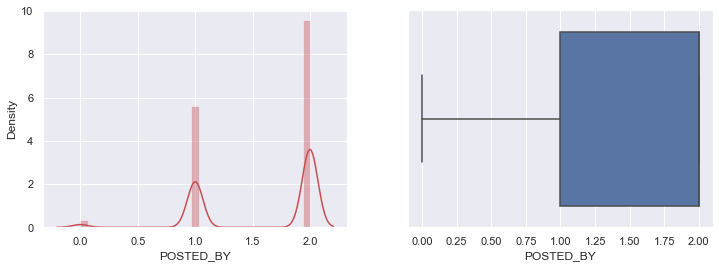

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['POSTED_BY'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['POSTED_BY'])

<AxesSubplot:xlabel='BHK_NO.'>

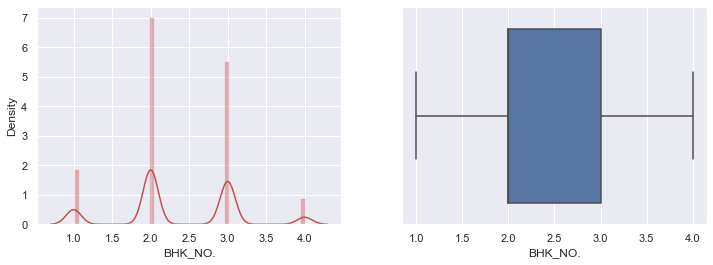

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['BHK_NO.'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['BHK_NO.'])

<AxesSubplot:xlabel='SQUARE_FT'>

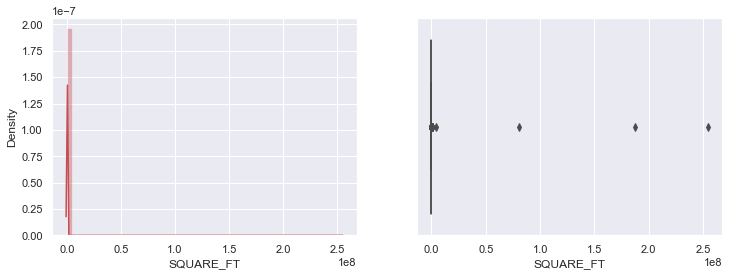

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['SQUARE_FT'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['SQUARE_FT'])

In [43]:
per75 = df['SQUARE_FT'].quantile(0.75) 
per25 = df['SQUARE_FT'].quantile(0.25)

iqr = per75 - per25
iqr

636.0

In [44]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

print('upper_l', upper_limit)
print('lower_l', lower_limit)

upper_l 2489.0
lower_l -55.0


In [45]:
df = df[(df['SQUARE_FT'] < upper_limit) & (df['SQUARE_FT'] > lower_limit)]

<AxesSubplot:xlabel='SQUARE_FT'>

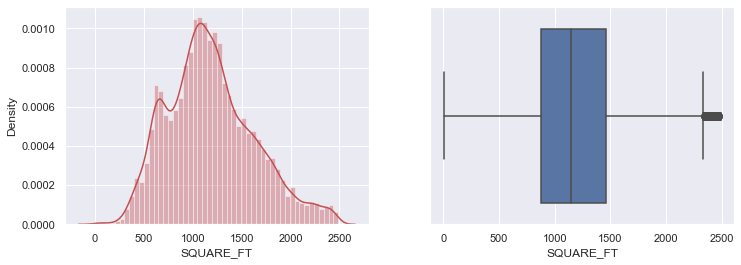

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['SQUARE_FT'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['SQUARE_FT'])

<AxesSubplot:xlabel='PRICE'>

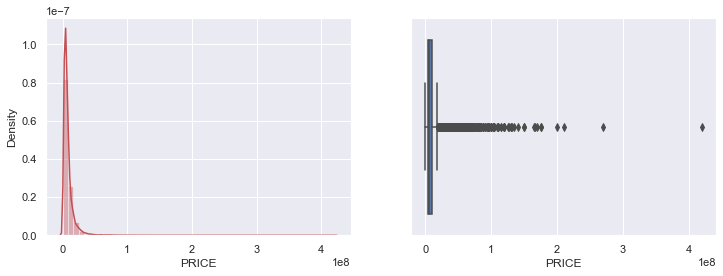

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['PRICE'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['PRICE'])

In [48]:
per75 = df['PRICE'].quantile(0.75) 
per25 = df['PRICE'].quantile(0.25)

iqr = per75 - per25
iqr

5900000.0

In [49]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

print('upper_l', upper_limit)
print('lower_l', lower_limit)

upper_l 18350000.0
lower_l -5250000.0


In [50]:
df = df[(df['PRICE'] < upper_limit) & (df['PRICE'] > lower_limit)]

<AxesSubplot:xlabel='PRICE'>

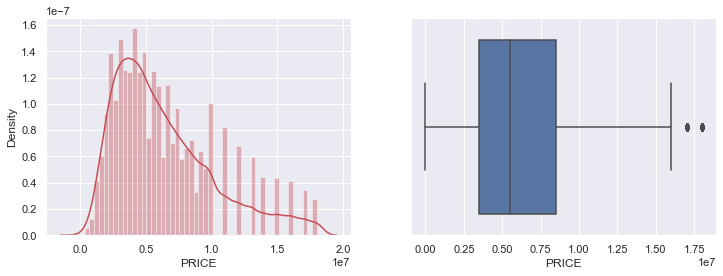

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['PRICE'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df['PRICE'])

<AxesSubplot:>

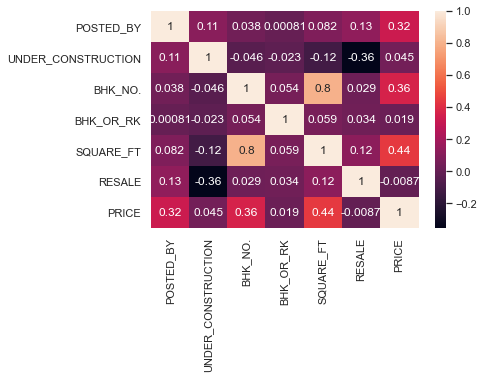

In [52]:
sns.heatmap(df.corr(), annot=True)

In [53]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,LOCATION,PRICE
0,1,0,2,1,1300,1,Bangalore,5500000
1,2,0,2,1,1275,1,Mysore,5100000
2,1,0,2,1,933,1,Bangalore,4300000
3,1,0,2,1,929,1,Ghaziabad,6200000
4,2,1,2,1,999,1,Kolkata,6000000


In [54]:
df = df[df['BHK_OR_RK'] != 0]

In [55]:
df.drop('BHK_OR_RK', axis=1, inplace=True)

In [56]:
df.drop('RESALE', axis=1, inplace=True)

<AxesSubplot:>

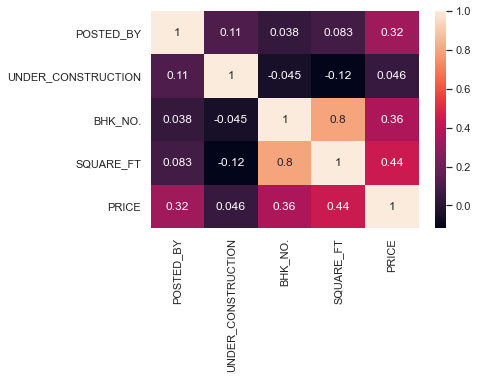

In [57]:
sns.heatmap(df.corr(), annot=True)

In [58]:
per75 = df['PRICE'].quantile(0.75) 
per25 = df['PRICE'].quantile(0.25)

iqr = per75 - per25
iqr

5000000.0

In [59]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

print('upper_l', upper_limit)
print('lower_l', lower_limit)

upper_l 16000000.0
lower_l -4000000.0


In [60]:
df1 = df[(df['PRICE'] < upper_limit) & (df['PRICE'] > lower_limit)]

<AxesSubplot:xlabel='PRICE'>

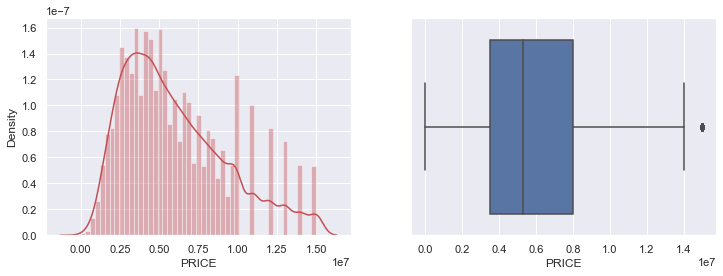

In [61]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1['PRICE'], color='r')

plt.subplot(1,2,2)
sns.boxplot(df1['PRICE'])

In [62]:
X = df1.drop('PRICE',axis=1)
y = df1['PRICE']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [64]:
X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,SQUARE_FT,LOCATION
22435,2,0,3,1355,Chennai
21408,2,0,2,1206,Gandhinagar
8639,1,0,2,590,Chennai
26991,2,1,2,1311,Gurgaon
5937,1,0,2,900,Kolkata


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [69]:
from xgboost import XGBRegressor

step1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, drop='first'),[4])
],remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_1 = pipe.predict(X_train)

print('--------------train score-----------------')
print('r2 score:', r2_score(y_train,y_pred_1))
print('--------------test score------------------')
print('r2 score:', r2_score(y_test,y_pred))

--------------train score-----------------
r2 score: 0.7289279624382701
--------------test score------------------
r2 score: 0.6524399307217645


In [76]:
from sklearn.linear_model import LinearRegression

step1 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, drop='first'),[4])
],remainder='passthrough')

step2 = LinearRegression(normalize=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_1 = pipe.predict(X_train)

print('--------------train score-----------------')
print('r2 score:', r2_score(y_train,y_pred_1))
print('--------------test score------------------')
print('r2 score:', r2_score(y_test,y_pred))

--------------train score-----------------
r2 score: 0.6106517297934415
--------------test score------------------
r2 score: 0.6026954773066566


In [77]:
import pickle

pickle.dump(pipe, open('pipe.pkl','wb'))
pickle.dump(df1, open('df.pkl','wb'))

In [73]:
X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,BHK_NO.,SQUARE_FT,LOCATION
22435,2,0,3,1355,Chennai
21408,2,0,2,1206,Gandhinagar
8639,1,0,2,590,Chennai
26991,2,1,2,1311,Gurgaon
5937,1,0,2,900,Kolkata


In [74]:
pipe.predict([[2,0,2,600,'Mumbai']])

array([9927586.], dtype=float32)